Calcolo per ogni genere il numero di show (serie tv o film).

In [1]:
import pandas as pd

In [4]:
data = pd.read_excel("NEW_MERGE.xlsx")

In [5]:
data

,Titolo,Paese,Produzione,Distribuzione,Cast,Creatore,Durata_episodio,Genere,Genere_unico,Sommario,Average_rating,Num_votes,tag_name,Indice_generale,Indice_tipo,Indice_totale,confidence,Tipo,N_stagioni,N_episodi
0,Age of Samurai: Battle for Japan,United States,Netflix,Netflix,Masayoshi Haneda Masami Kosaka Hideaki Itō Hay...,NaN,44.0,"Documentary,History,War",Documentary,Age of Samurai: Battle for Japan is an America...,7.4,2781.0,Positive,0.023967,0.027273,0.051240,0.705,Serie-TV,1.0,6.0
1,Agents of S.H.I.E.L.D.,United States,ABC Studios Marvel Television Mutant Enemy Pro...,Walt Disney Television,Clark Gregg Ming-Na Wen Brett Dalton Chloe Ben...,Joss Whedon Jed Whedon Maurissa Tancharoen,42.0,"Action Drama,Science fiction,Superhero",Science fiction,Marvel's Agents of S.H.I.E.L.D. is an American...,7.5,202704.0,Positive,0.000000,0.019835,0.019835,0.531,Serie-TV,7.0,136.0
2,Alice in Borderland,Japan,Robot Communications Inc.,Netflix,Kento Yamazaki Tao Tsuchiya Yūki Morinaga Keit...,"Antoine Rodelet, Josselin Charier",46.0,"Science fiction,Suspense-thriller,Drama",Science fiction,"Alice in Borderland (Japanese: 今際の国のアリス, Hepbu...",7.7,20325.0,Negative,0.047934,0.097521,0.145455,0.941,Serie-TV,1.0,8.0
3,Alien Worlds,United Kingdom,Wall to Wall Media,Netflix,NaN,NaN,44.0,"Docufiction,Science fiction,Speculative evolution",Documentary,Alien Worlds is a British sci-fi nature docufi...,6.5,2804.0,Negative,0.004959,0.030579,0.035537,0.587,Serie-TV,1.0,4.0
4,Behind Her Eyes,United Kingdom,Sony Pictures Television Left Bank Pictures,Netflix,Eve Hewson Tom Bateman Simona Brown Robert Ara...,Steve Lightfoot,50.0,"Psychological thriller,Supernatural fiction",Thriller,Behind Her Eyes is a British supernatural psyc...,7.2,41380.0,Positive,0.137190,0.169421,0.306612,0.547,Serie-TV,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data[data["Genere_unico"] == "Family"]

,Titolo,Paese,Produzione,Distribuzione,Cast,Creatore,Durata_episodio,Genere,Genere_unico,Sommario,Average_rating,Num_votes,tag_name,Indice_generale,Indice_tipo,Indice_totale,confidence,Tipo,N_stagioni,N_episodi
111,Full Out 2: You Got This!,United States,Deverett Media Group,NaN,NaN,NaN,91.0,Family,Family,NaN,4.7,333.0,Negative,0.0,0.002479,0.002479,0.947,Film,NaN,NaN


In [14]:
data[data["Genere_unico"] == "Romance"]

,Titolo,Paese,Produzione,Distribuzione,Cast,Creatore,Durata_episodio,Genere,Genere_unico,Sommario,Average_rating,Num_votes,tag_name,Indice_generale,Indice_tipo,Indice_totale,confidence,Tipo,N_stagioni,N_episodi
7,Bridgerton,United States,Shondaland,Netflix,Adjoa Andoh Lorraine Ashbourne Jonathan Bailey...,Chris Van Dusen,64.0,"Regency romance,Period drama",Romance,Bridgerton is an American streaming television...,7.7,77220.0,Negative,0.400826,0.462810,0.863636,0.844,Serie-TV,1.0,8.0
27,Love Alarm,South Korea,Studio DragonProduction H (season 2),Netflix,Kim So-hyun Song Kang Jung Ga-ram,NaN,49.0,Romance,Romance,Love Alarm (Korean: 좋아하면 울리는; RR: Joahamyeon U...,7.1,3329.0,Negative,0.000826,0.002479,0.003306,0.701,Serie-TV,2.0,14.0
63,Virgin River,United States,Reel World Management,Netflix,Alexandra Breckenridge Martin Henderson Colin ...,NaN,44.0,Romantic drama,Romance,Virgin River is an American romantic drama str...,7.5,21155.0,Negative,0.073554,0.111570,0.185124,0.666,Serie-TV,2.0,20.0
109,Fifty Shades Freed,United States,Perfect World Pictures,Universal Pictures,Dakota Johnson Jamie Dornan Eric Johnson Rita ...,Niall Leonard,105.0,Romance,Romance,Fifty Shades Freed is a 2018 American erotic r...,4.5,56906.0,Negative,0.044628,0.061983,0.106612,0.769,Film,NaN,NaN


In [22]:
(0.185124+0.106612)/2

0.145868

In [17]:
data[data["Genere_unico"] == "Thriller"]["Indice_totale"].median()

0.11735537189

In [18]:
data[data["Genere_unico"] == "Romance"]["Indice_totale"].median()

0.14586776855

Creo dataframe ausiliario:

In [33]:
generi = data.groupby("Genere_unico", as_index= False).count()[["Genere_unico","Titolo"]]

In [44]:
generi = generi.sort_values(by="Titolo", ascending=False)

In [45]:
generi

,Genere_unico,Titolo
0,Action,37
8,Drama,37
4,Comedy,31
9,Dramedy,17
1,Adventure,13
7,Documentary,12
3,Biography,11
12,Horror,10
5,Crime,8
15,Thriller,8


Distribuzione del numero di show per genere.

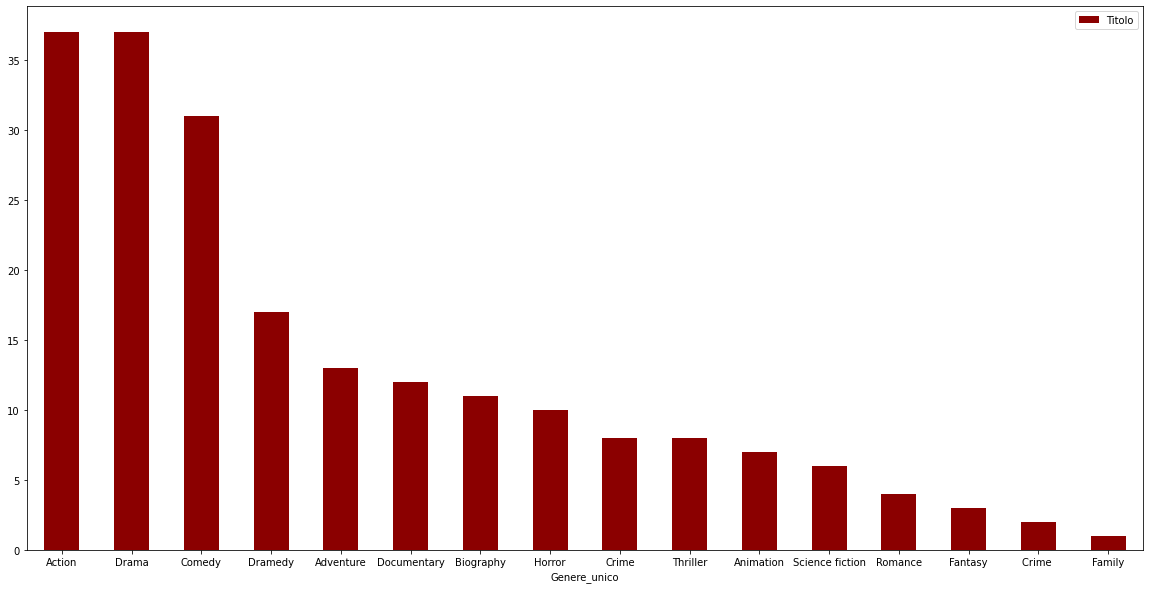

In [52]:
ax = generi.plot.bar(x='Genere_unico', y='Titolo', color='#8b0000', rot=0, figsize=(20,10))